In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Volvemos a utilizar el dataset Iris que ya conocemos para aplicar clustering. Es cierto que este dataset está preparado para ser un problema de clasificación, pero si ignoramos el target, podríamos encontrarnos ante una situación de un problema no supervisado.

In [16]:
from sklearn.datasets import load_iris

In [17]:
iris = load_iris()

In [32]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df['target_num'] = iris.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_num
6,4.6,3.4,1.4,0.3,setosa,0
47,4.6,3.2,1.4,0.2,setosa,0
76,6.8,2.8,4.8,1.4,versicolor,1
134,6.1,2.6,5.6,1.4,virginica,2
9,4.9,3.1,1.5,0.1,setosa,0


Como recordatorio de la clase de ayer, vamos a visualizar de nuevo el dataset.

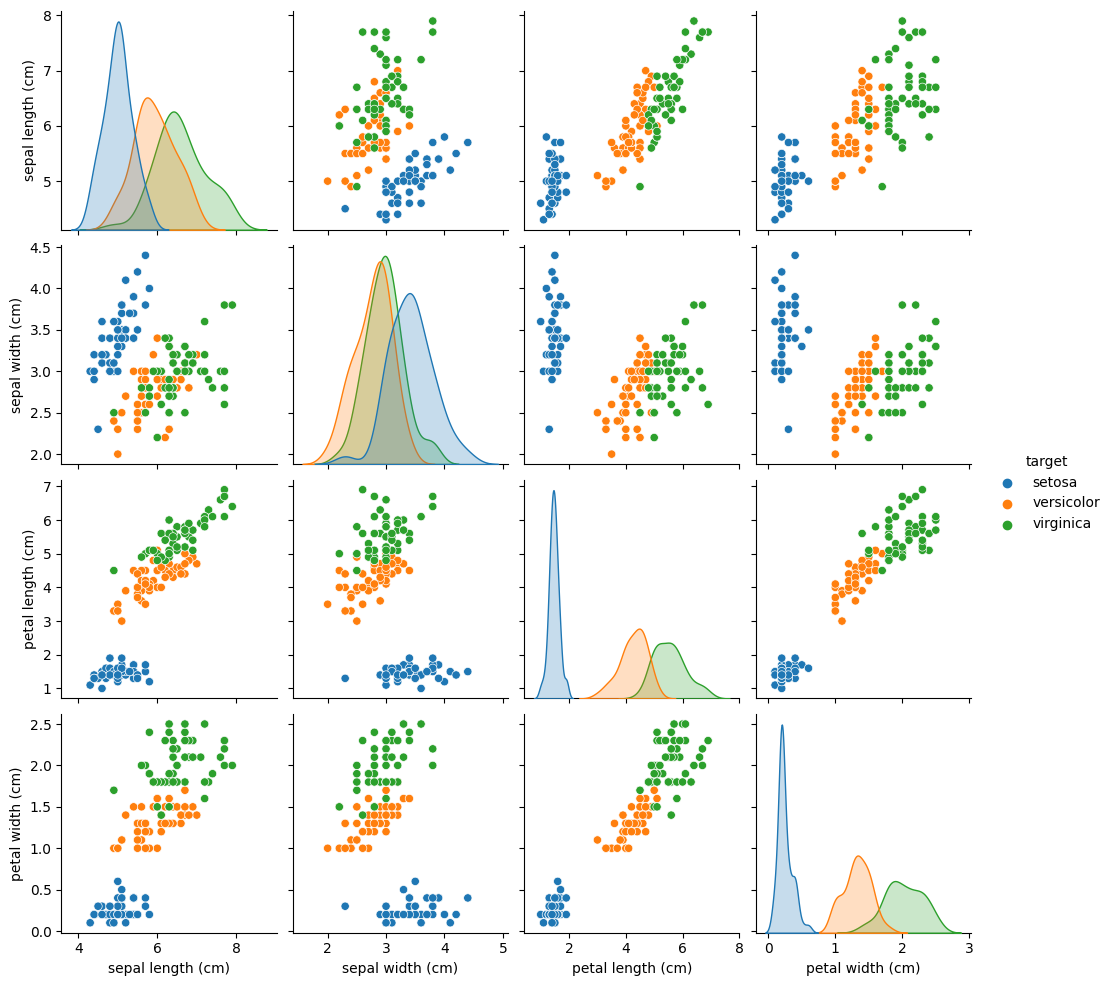

In [19]:
sns.pairplot(df.drop("target_num", axis=1), hue="target")
plt.show()

In [22]:
x = iris.data
target = iris.target

print(x.shape, target.shape)

(150, 4) (150,)


Con la distribución anterior de los datos, es muy probable que sea posible aplicar exitosamente un algoritmo de clustering. Concretamente, vamos a comenzar con el clustering aglomerativo.

In [20]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

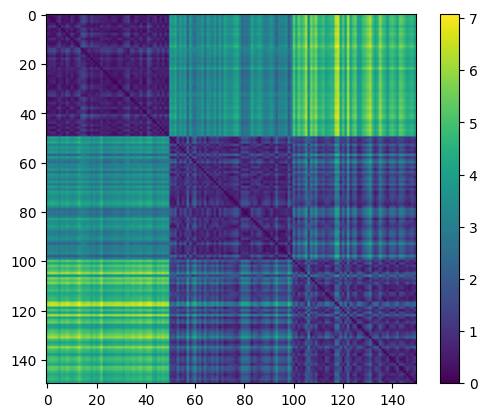

In [23]:
matriz_distancias = euclidean_distances(x, x)
plt.imshow(matriz_distancias)
plt.colorbar()
plt.show()

# Implementación manual del algoritmo

In [24]:
# Se guarda una copia de los datos originales para calcular los centroides
datos_original = np.copy(x)
datos = np.copy(x)

# A partir de aquí comienza el algoritmo
# Se guardan los singleton clusters para calcular los centroides, es decir,
# tenemos muchos "saquitos" de un único elemento
set_lists = [[i] for i in range(len(datos))]

while len(datos) > 1:
  # Se calcula la matriz de distancias
  matriz_distancias = euclidean_distances(datos)
  # OJO: Importante "distorsionar" la diagonal para no considerar las distancias 0s con el mínimo
  matriz_distancias = matriz_distancias + np.eye(len(datos)) * (matriz_distancias.max() + 1)
  # Obtenemos el índice del argmin
  ind = np.unravel_index(np.argmin(matriz_distancias), matriz_distancias.shape)

  # Actualización de la lista de clusters.
  set1, set2 = set_lists[ind[0]], set_lists[ind[1]]
  nuevo_set = set1 + set2
  set_lists.remove(set1)
  set_lists.remove(set2)
  set_lists.append(nuevo_set)

  # Actualización de la lista de centroides con el nuevo centroide
  nuevo = datos_original[nuevo_set].mean(axis=0, keepdims=True)
  datos = np.delete(datos, ind, 0)
  datos = np.append(datos, nuevo, axis=0)
  print(np.around(matriz_distancias.min(), decimals=4), "\t", set_lists)

0.0 	 [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [143], [144], [145], [146], [147], [148], [149], [101, 142]]
0.1 	 [[0], [1], [2], [3], [4], [5], [6], [8], [9], [10

## Comprobación con la librería scipy

In [25]:
Z = linkage(x, method='centroid', metric='euclidean')

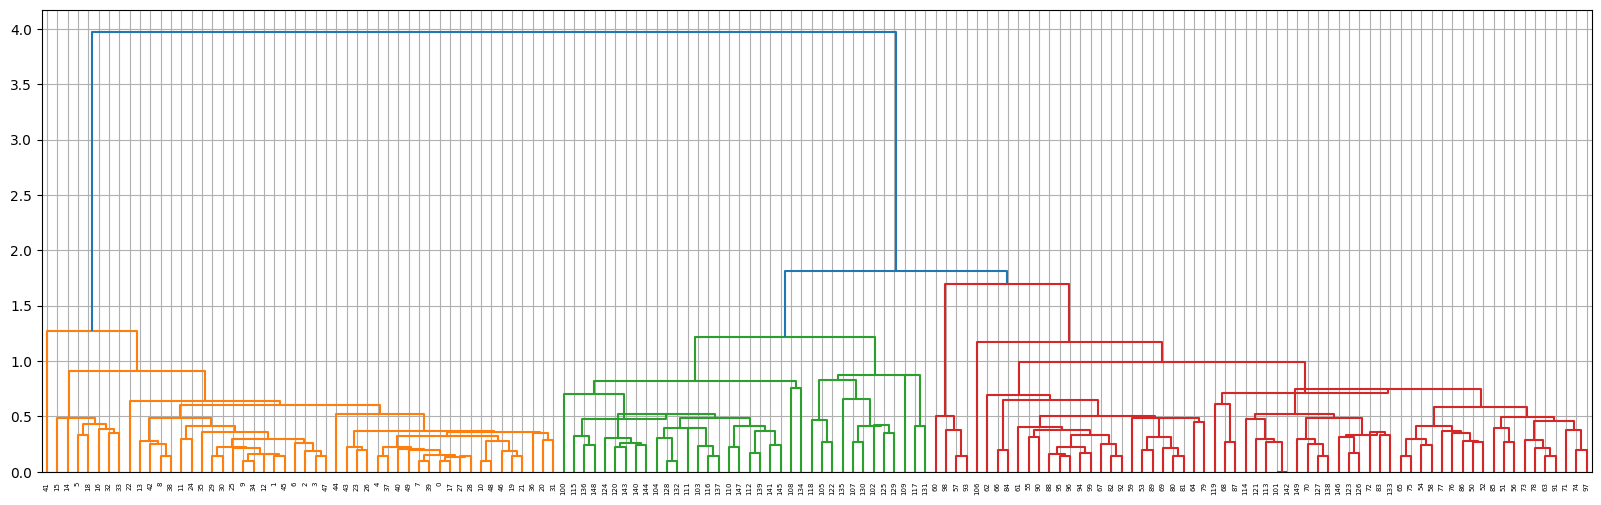

In [26]:
plt.figure(figsize=(20, 6))
dn = dendrogram(Z, color_threshold=1.81)
plt.grid()
plt.show()

In [27]:
clusters = fcluster(Z, 1.81, criterion='distance')

In [36]:
df_clusters = pd.concat([df, pd.Series(clusters, name='cluster')], axis=1)
df_clusters

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_num,cluster
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1
3,4.6,3.1,1.5,0.2,setosa,0,1
4,5.0,3.6,1.4,0.2,setosa,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,2
146,6.3,2.5,5.0,1.9,virginica,2,3
147,6.5,3.0,5.2,2.0,virginica,2,2
148,6.2,3.4,5.4,2.3,virginica,2,2


Una vez tenemos el corte apropiado en el histograma, vamos a visualizar los datos según los clusters.

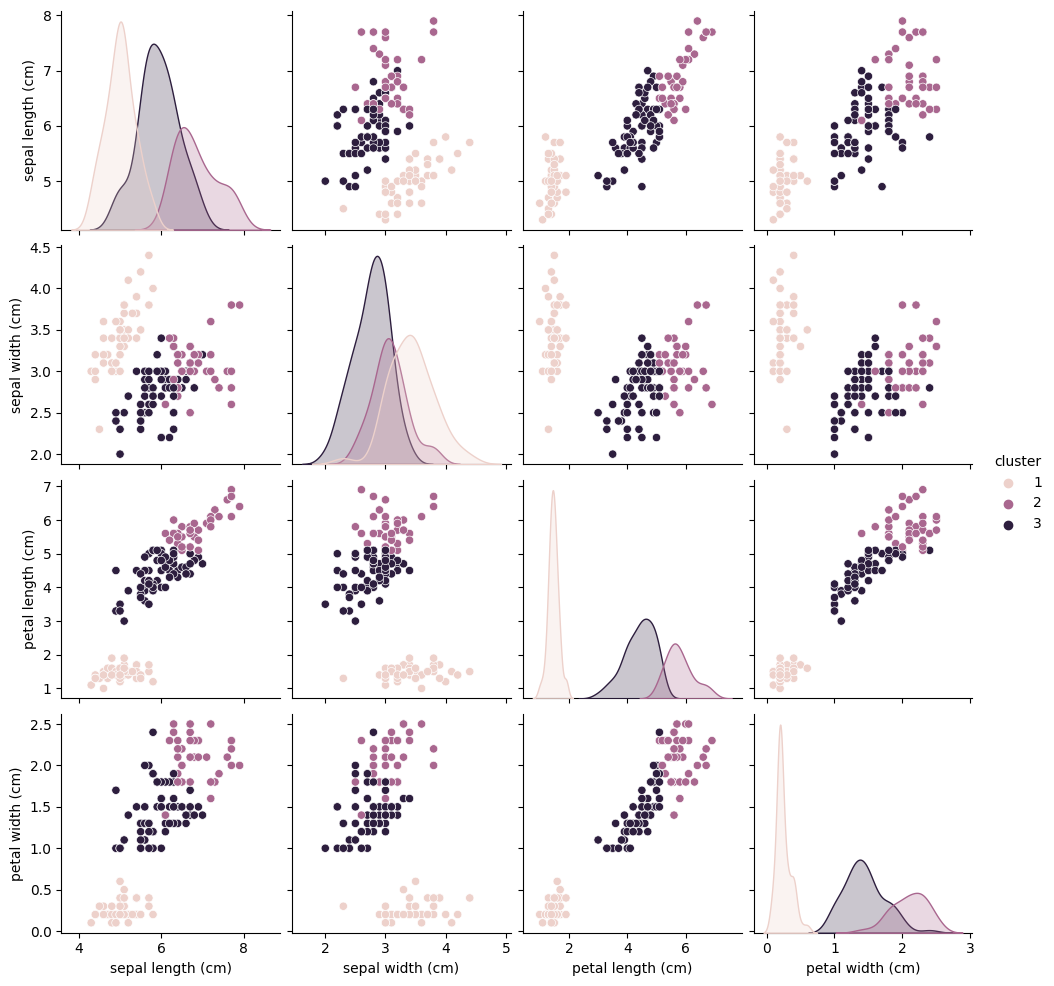

In [38]:
sns.pairplot(df_clusters.drop(["target_num", "target"], axis=1), hue="cluster")
plt.show()

**Pregunta**: ¿Qué podemos concluir de este clustering?